# Constellation detection image preprocessing

Below, I have tried applying grayscaling and contrast stretch to one image of each class.

class very_good --> processing for train
very_good


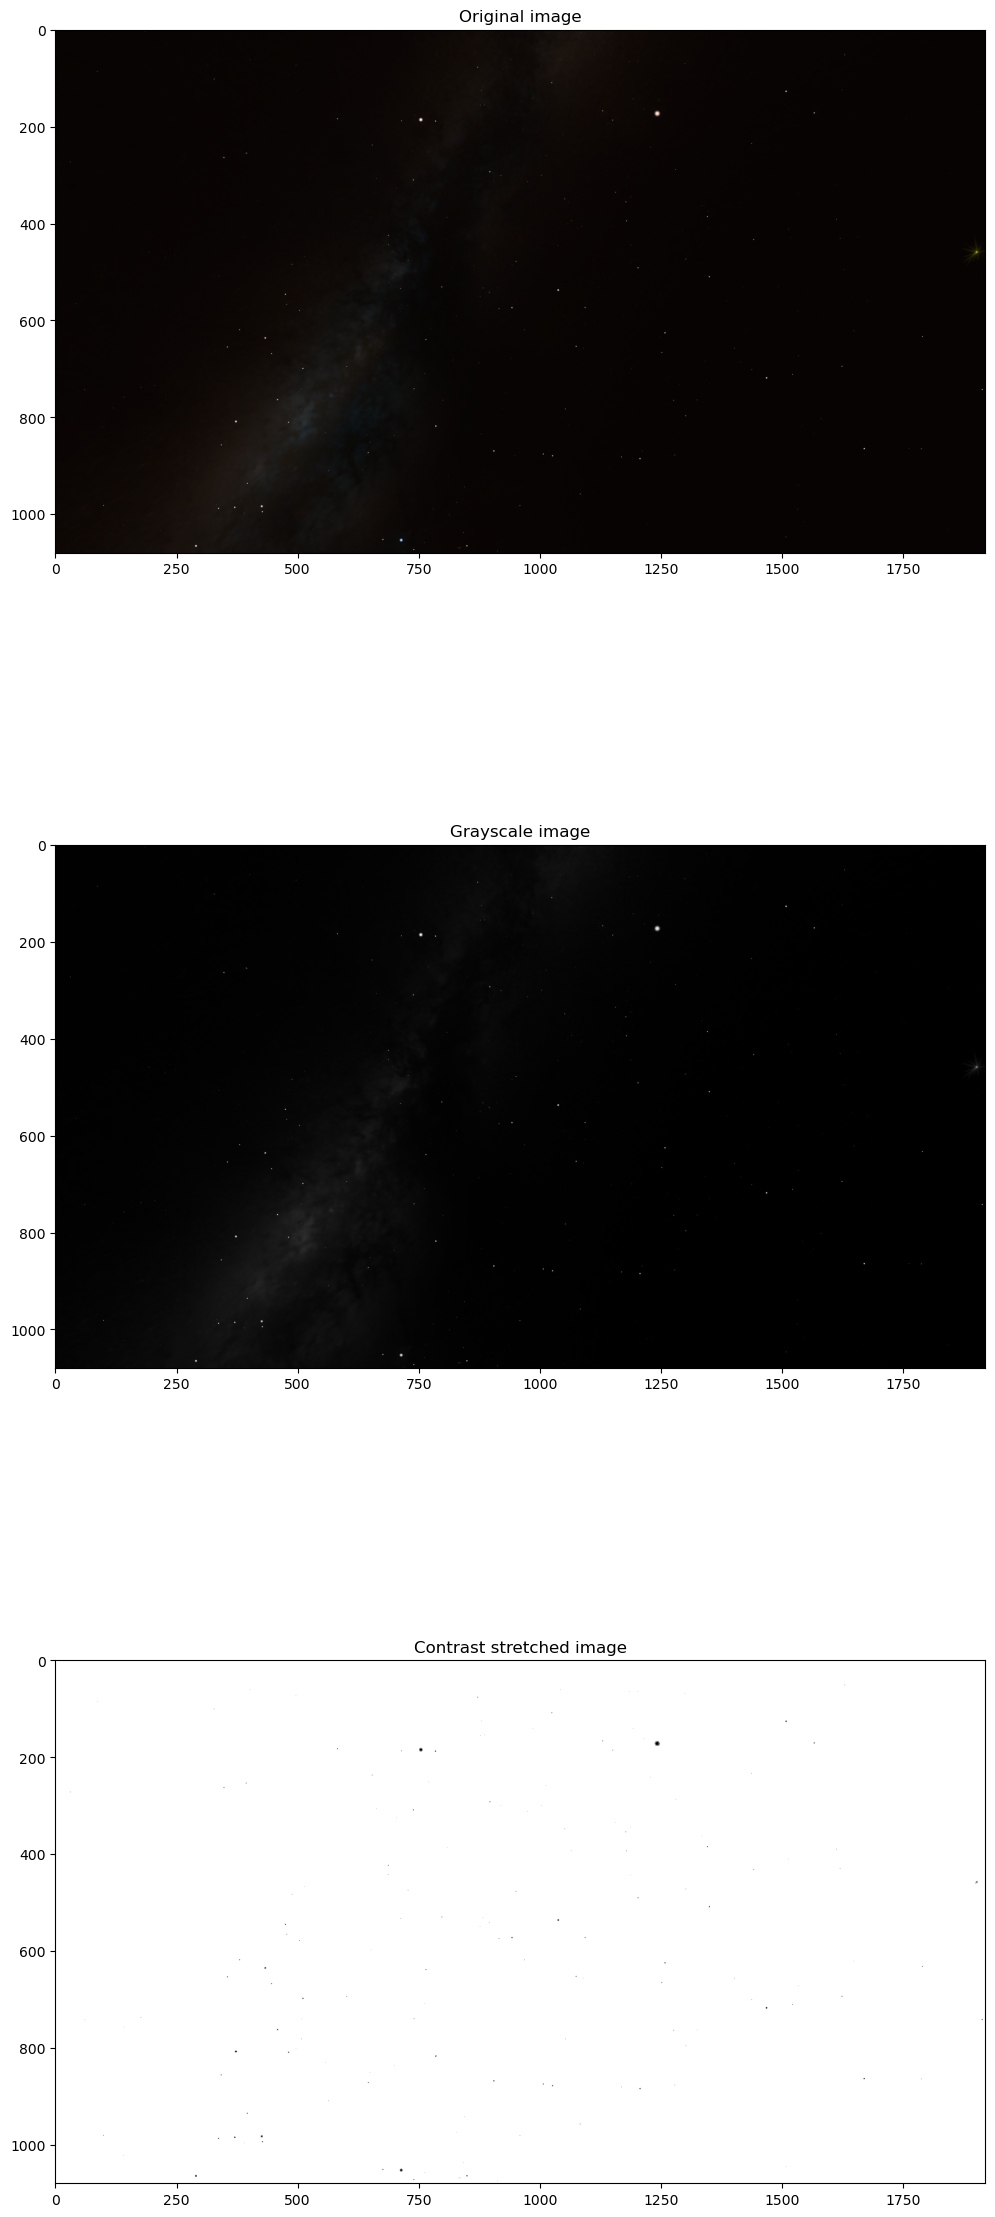

class good --> processing for test
good


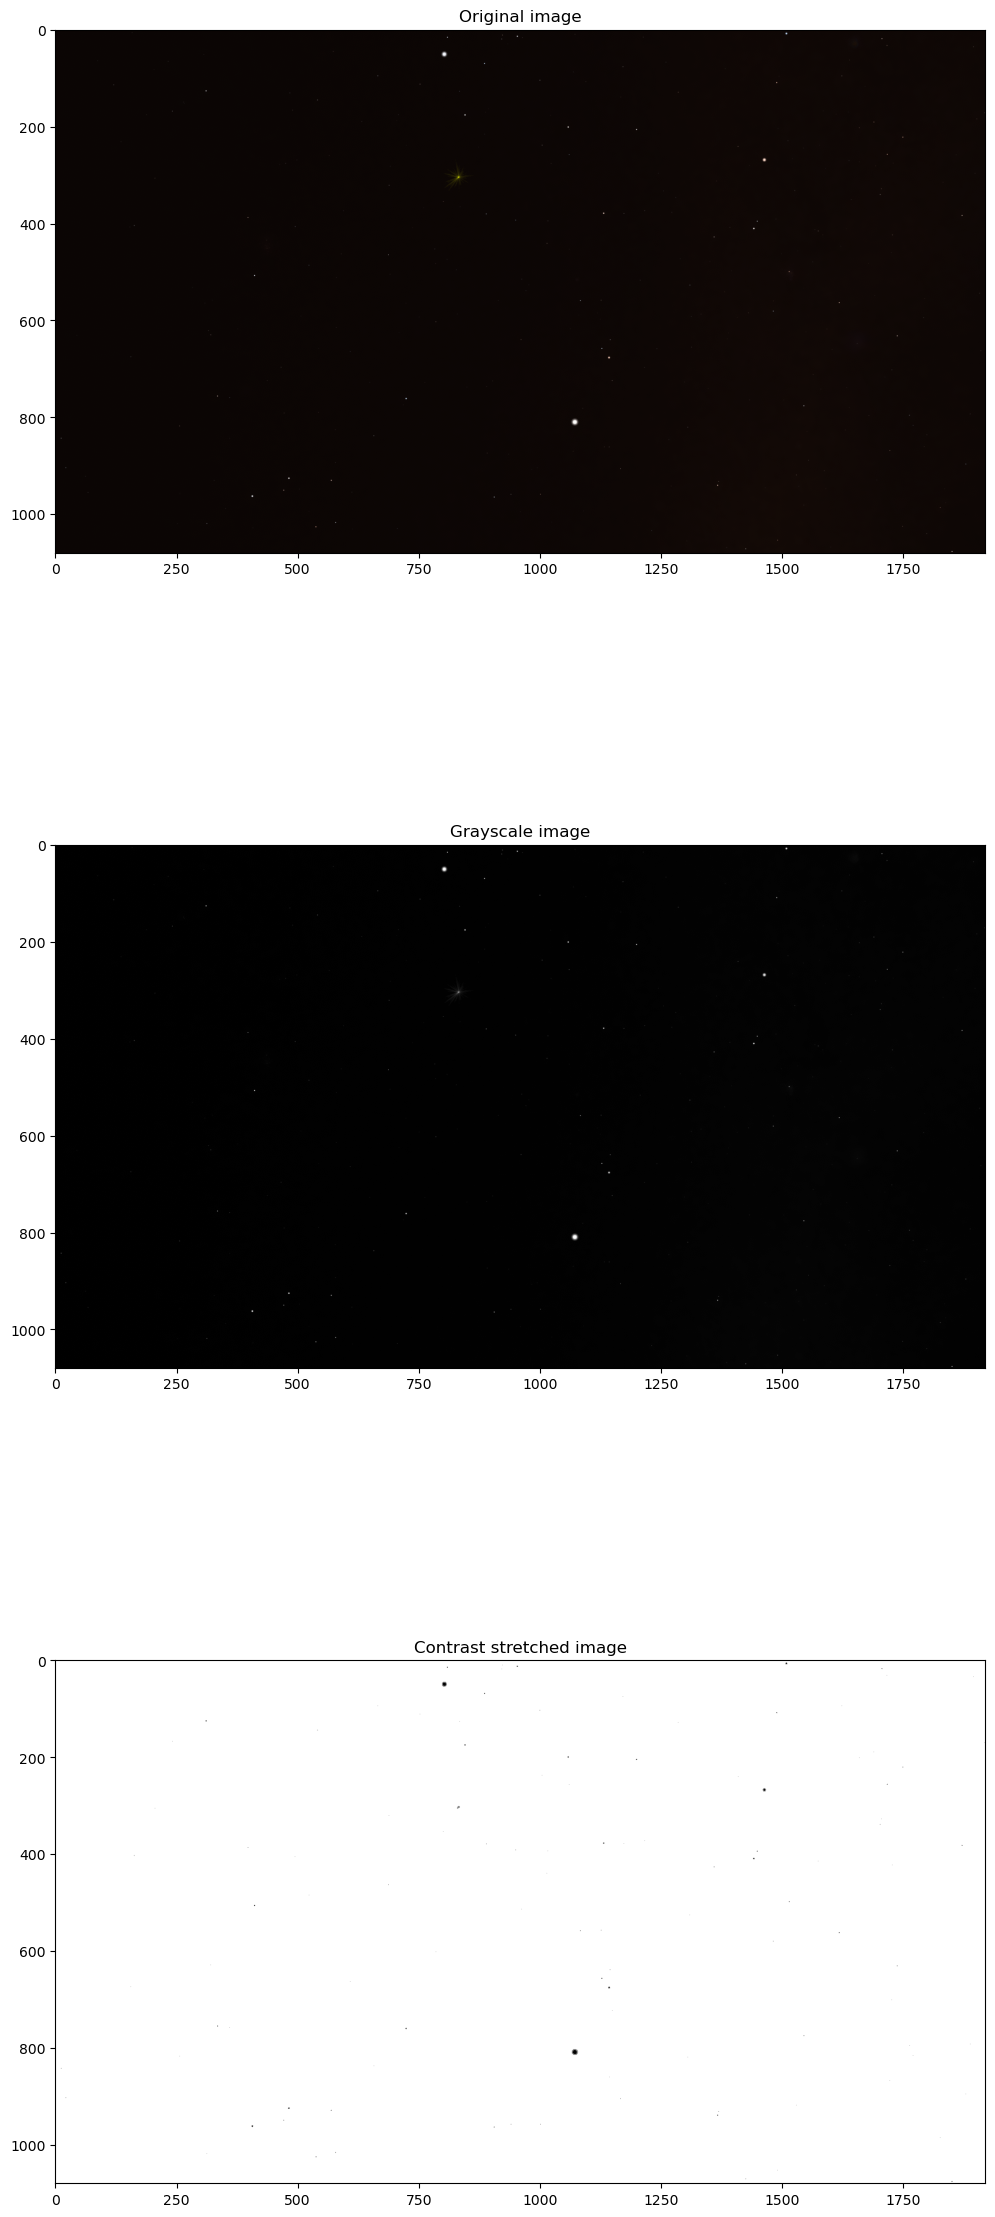

class poor --> processing for val
poor


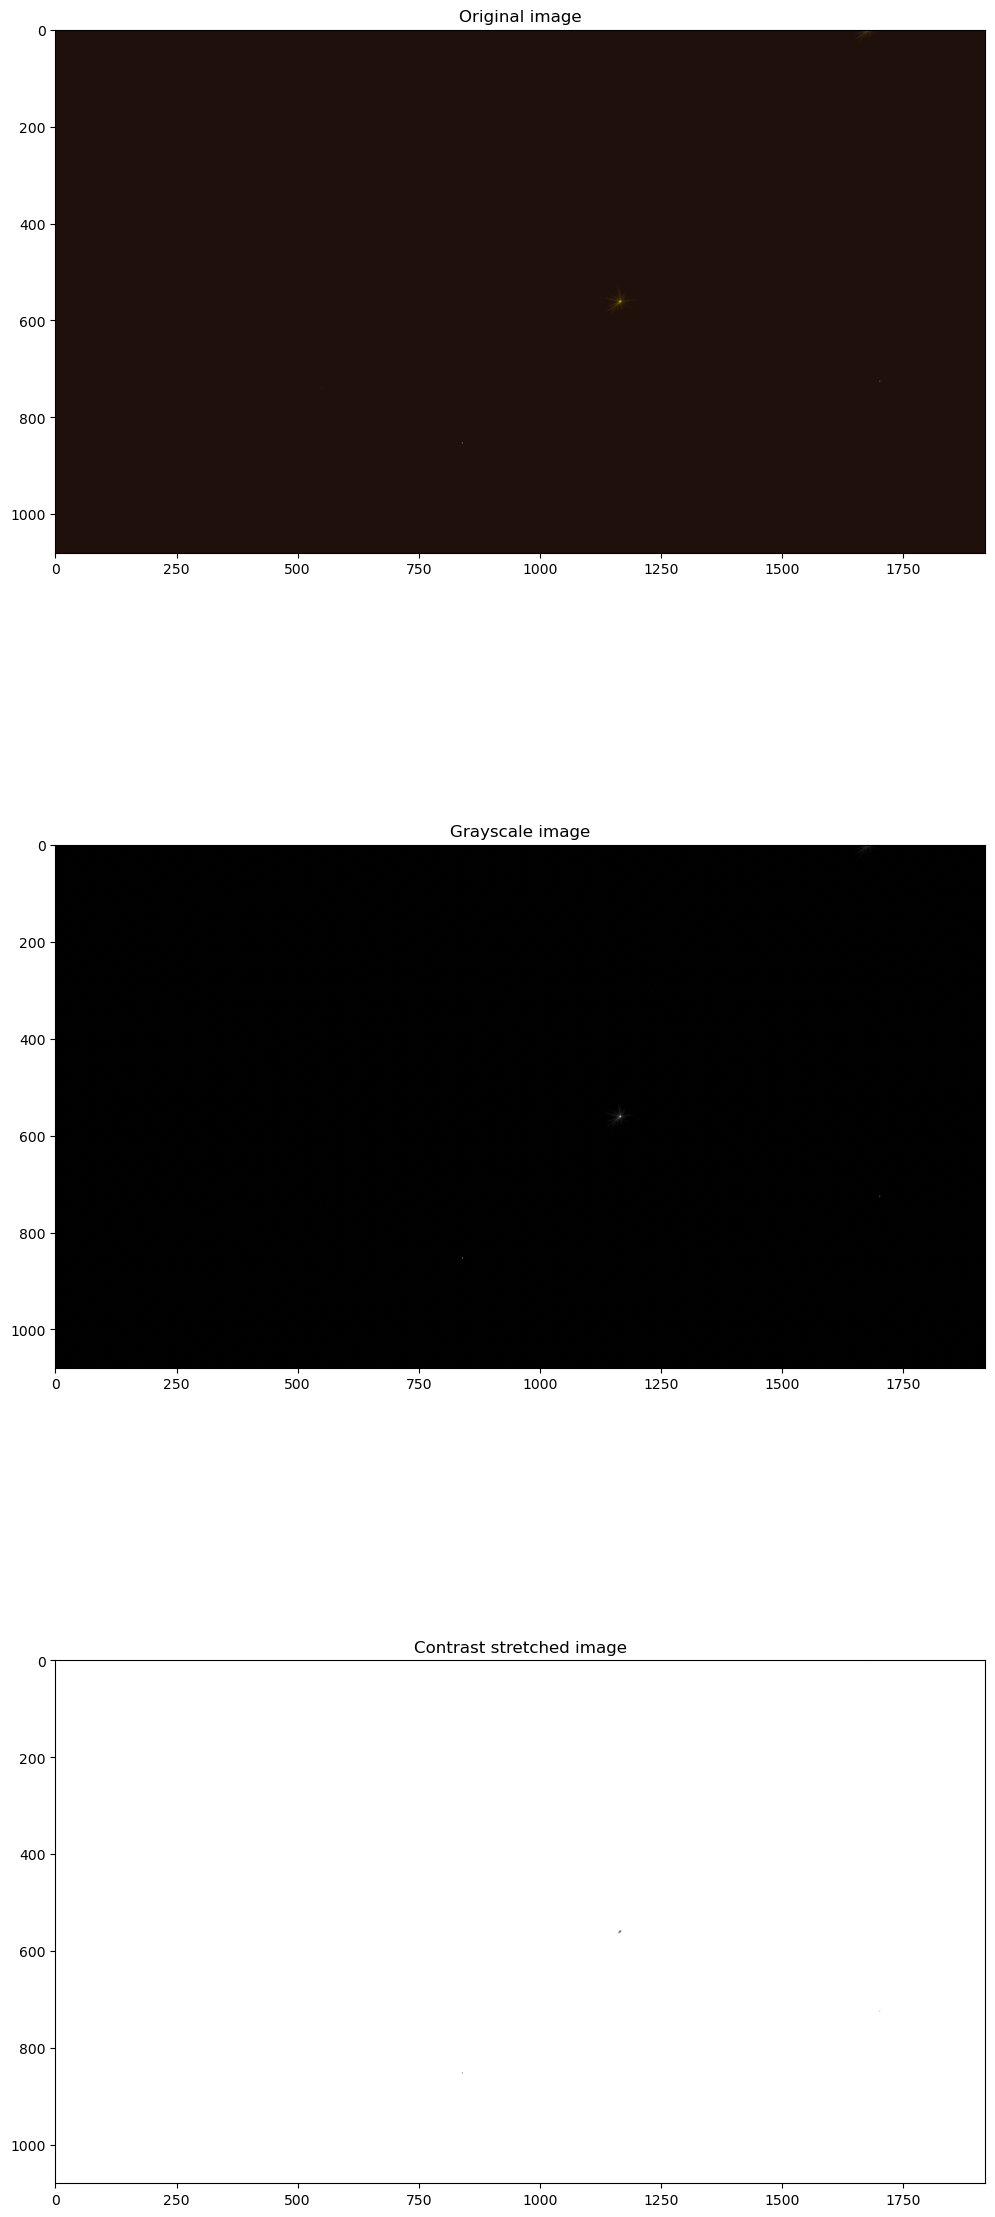

In [3]:
import cv2
import os
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from skimage import exposure, color

# data folder
data_dir = '/kaggle/input/clasificare2/clasificare2'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')
classes = os.listdir(train_dir)

def preprocess_images(train_dir, test_dir, val_dir):
     for dataset_dir, output_dir, c in [(train_dir, 'train', 'very_good'), (test_dir, 'test', 'good'), (val_dir, 'val', 'poor')]:
        classes = os.listdir(dataset_dir)
        print("class " + str(c) + " --> processing for " + str(output_dir))
        path = os.path.join(dataset_dir, c)
        out_path = os.path.join('/kaggle/working/preprocessed', output_dir, c)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            out_img_path = os.path.join(out_path, img_file)
            img = cv2.imread(img_path)
            print(c)
            fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 30))
            ax[0].imshow(img)
            ax[0].set_title("Original image")

            # normalize pixel values to be between 0 and 1
            img = img.astype('float32') / 255.0  

            # convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            ax[1].imshow(gray, cmap='gray')
            ax[1].set_title("Grayscale image")

            # Adjust the brightness and contrast of the image
            alpha = 2  # contrast control (1.0-3.0)
            beta = 30  # brightness control (0-100)
            adjusted = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)

            # rescale pixel values back to the 0-255 range and save the enhanced image
            adjusted = (adjusted * 255).astype('uint8')

            ax[2].imshow(adjusted, cmap='gray')
            ax[2].set_title("Contrast stretched image")

            plt.show()
            break

preprocess_images(train_dir, test_dir, val_dir)


# Light pollution classification image preprocessing

First, the original image is displayed. Then, Gaussian blurring is applied to reduce noise and smooth  Next, the image is converted from the BGR color space to the HSV color space. This conversion allows for better separation of color and brightness information. From the converted HSV image, the V channel (representing image brightness) is extracted. The V channel image is displayed using a grayscale colormap, highlighting the brightness information.

class very_good --> processing for train


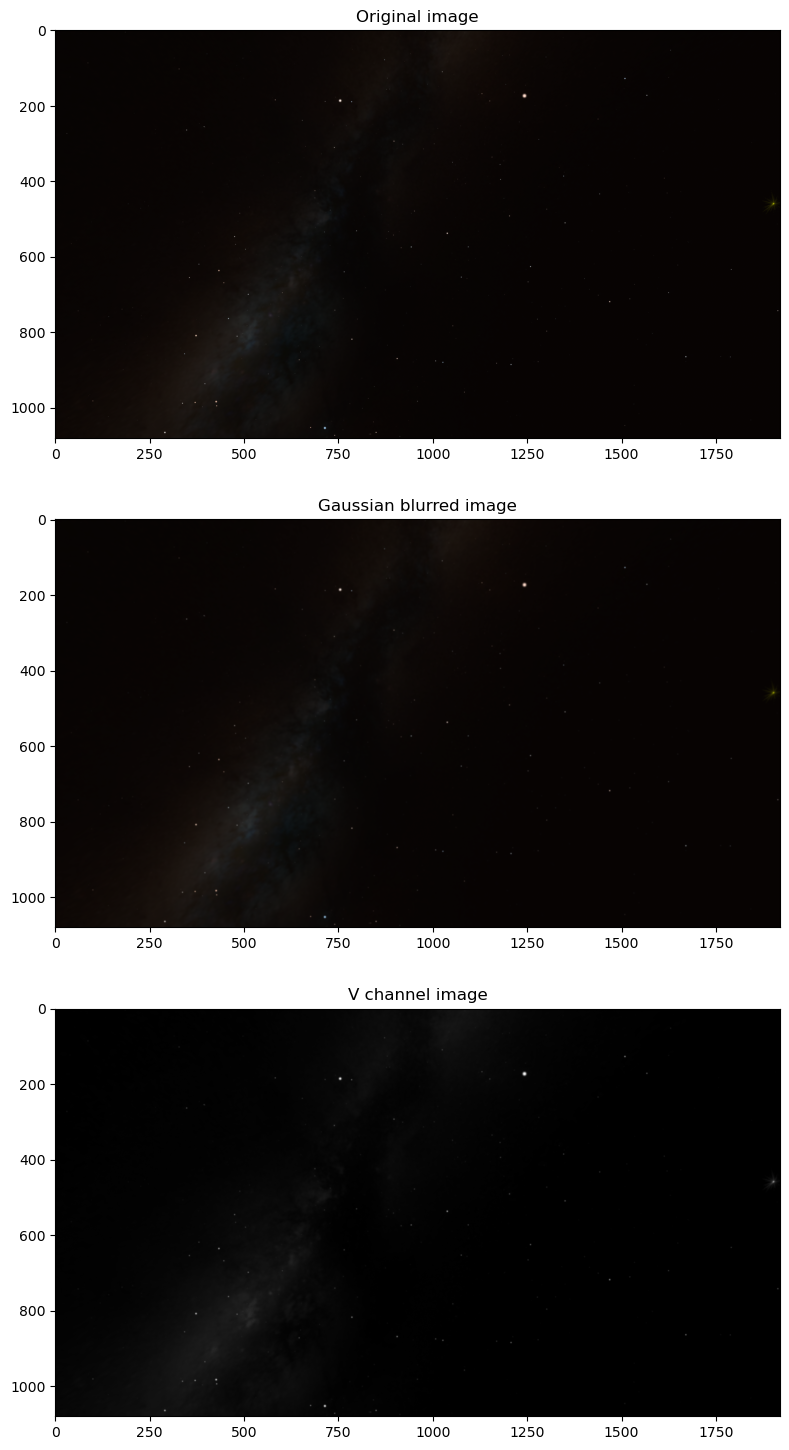

class good --> processing for test


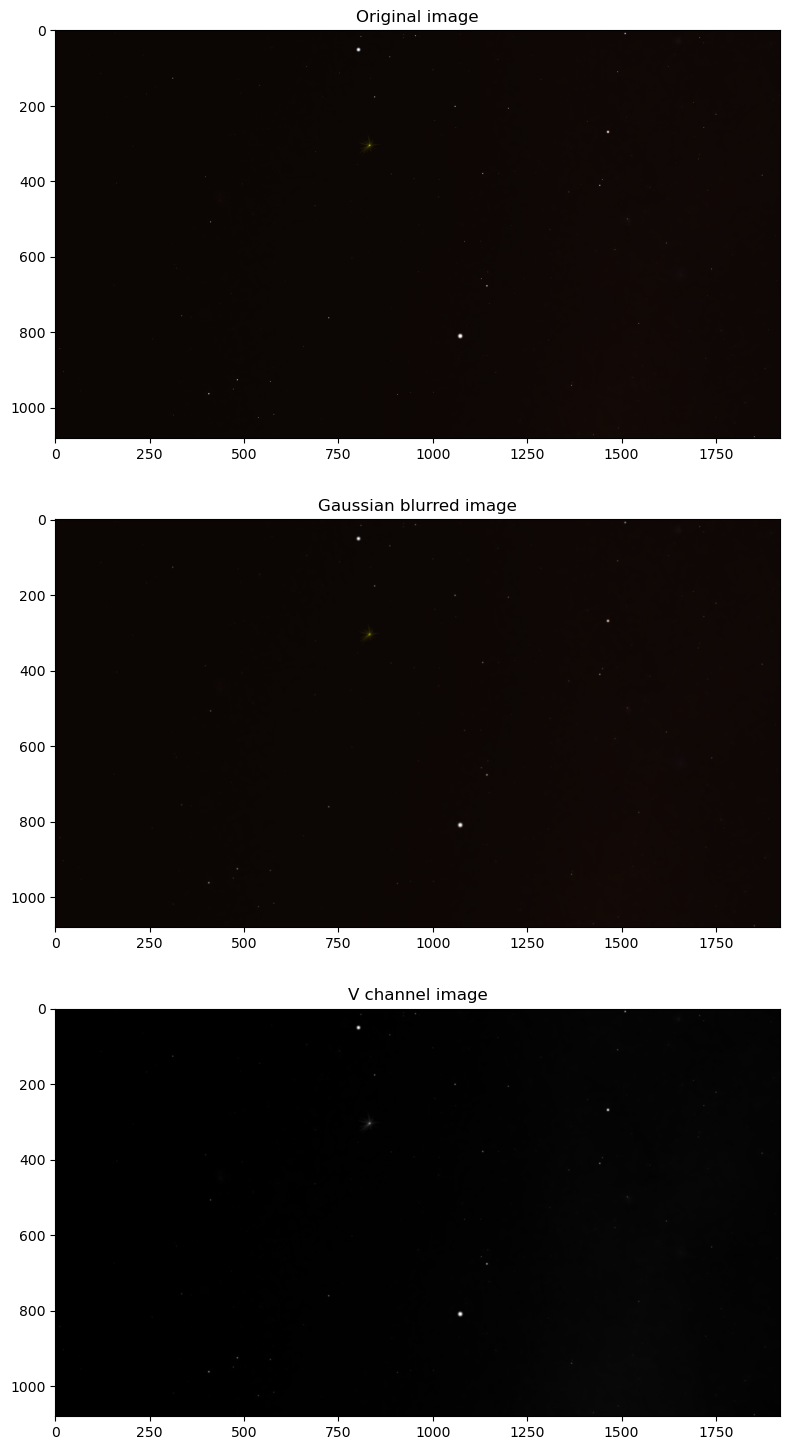

class poor --> processing for val


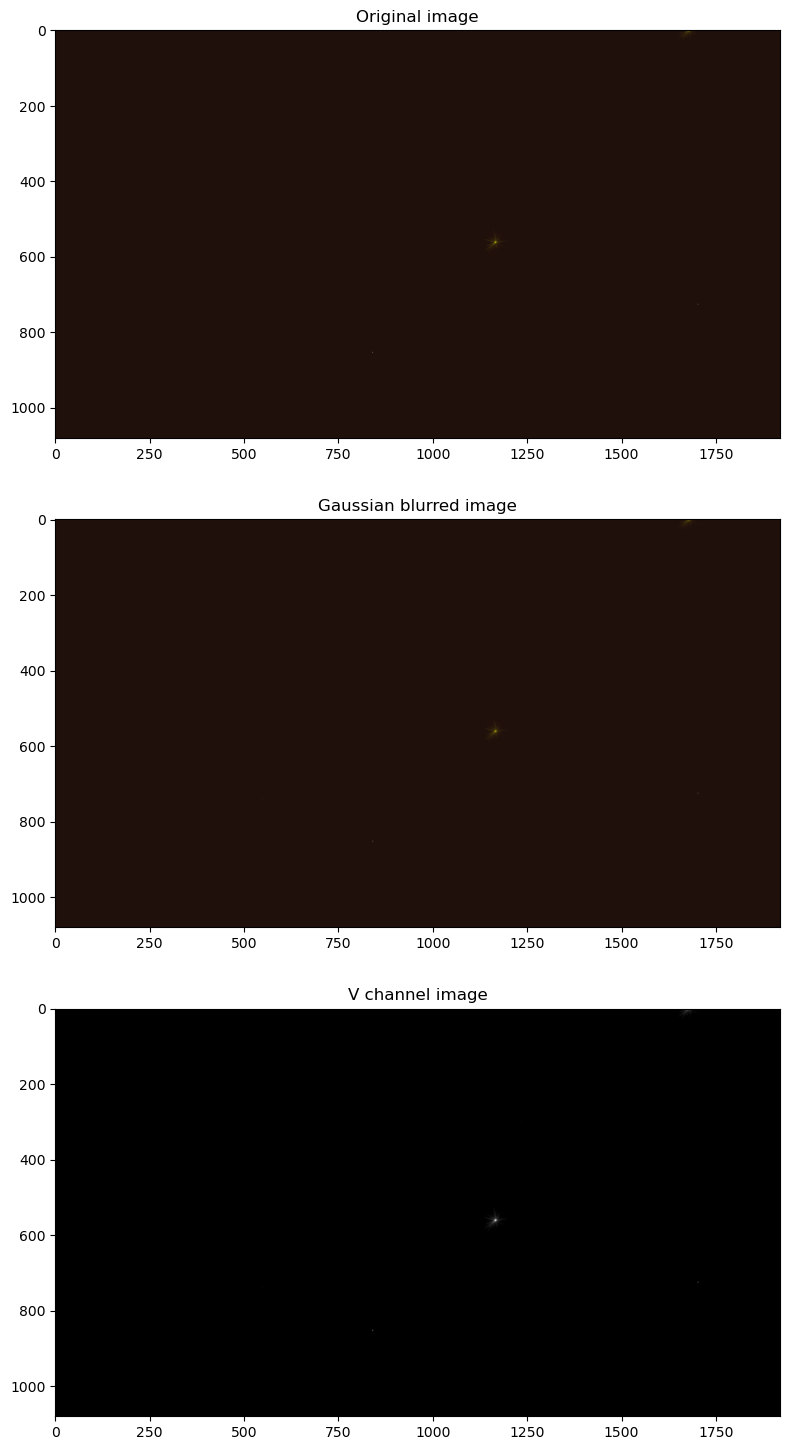

In [4]:
import cv2
import os
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from skimage import exposure, color

# data folders
data_dir = '/kaggle/input/clasificare2/clasificare2'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')
classes = os.listdir(train_dir)

def preprocess_images(train_dir, test_dir, val_dir):
     for dataset_dir, output_dir, c in [(train_dir, 'train', 'very_good'), (test_dir, 'test', 'good'), (val_dir, 'val', 'poor')]:
        print("class " + str(c) + " --> processing for " + str(output_dir))
        path = os.path.join(dataset_dir, c)
        out_path = os.path.join('/kaggle/working/preprocessed2', output_dir, c)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            out_img_path = os.path.join(out_path, img_file)
            img = cv2.imread(img_path)

            fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
            ax[0].imshow(img)
            ax[0].set_title("Original image")

            # Normalize pixel values to be between 0 and 1
            img = img.astype('float32') / 255.0

            # Apply Gaussian blurring to the image
            blurred = cv2.GaussianBlur(img, (5, 5), 0)

            ax[1].imshow(blurred)
            ax[1].set_title("Gaussian blurred image")

            # Convert the image to HSV color space
            hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

            # Extract the 'V' channel from the HSV image
            v_channel = hsv[:, :, 2]

            ax[2].imshow(v_channel, cmap='gray')
            ax[2].set_title("V channel image")

            plt.show()
            break

preprocess_images(train_dir, test_dir, val_dir)

# Trying different filters for light pollution classification images

* clear sky image

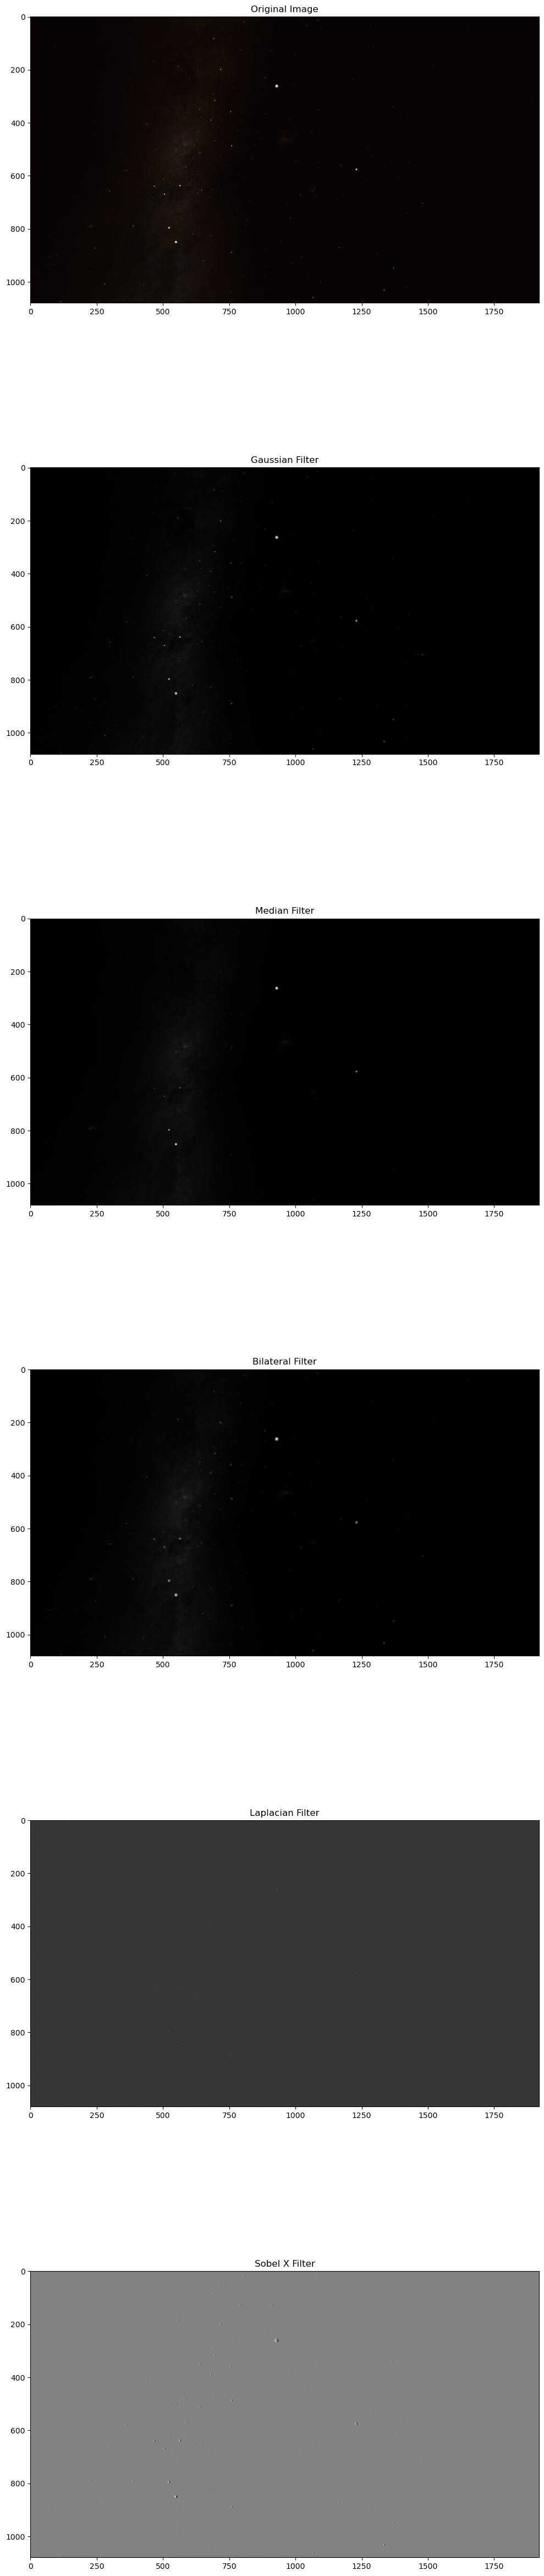

<Figure size 640x480 with 0 Axes>

In [7]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from skimage import filters

# read in an image
img_path = '/kaggle/input/clasificare2/clasificare2/train/very_good/260lines (2).png'
img = cv2.imread(img_path)

# normalization and grayscale conversion
img_norm = img.astype('float32') / 255.0
img_gray = cv2.cvtColor(img_norm, cv2.COLOR_BGR2GRAY)
# apply Laplacian filter
img_laplacian = filters.laplace(img_gray)
# apply different filters
img_gaussian = cv2.GaussianBlur(img_gray, (5, 5), 0)
img_median = cv2.medianBlur(img_gray, 5)
img_bilateral = cv2.bilateralFilter(img_gray, 9, 75, 75)
# img_laplacian = cv2.Laplacian(img_gray, cv2.CV_16S, ksize=3)
# img_laplacian = cv2.convertScaleAbs(img_laplacian)
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
img_sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)

# rescale pixel values back to the 0-255 range
img_gaussian = exposure.rescale_intensity(img_gaussian, out_range=(0, 255)).astype('uint8')
img_median = exposure.rescale_intensity(img_median, out_range=(0, 255)).astype('uint8')
img_bilateral = exposure.rescale_intensity(img_bilateral, out_range=(0, 255)).astype('uint8')
# img_laplacian = exposure.rescale_intensity(img_laplacian, out_range=(0, 255)).astype('uint8')
img_sobel_x = exposure.rescale_intensity(img_sobel_x, out_range=(0, 255)).astype('uint8')
img_sobel_y = exposure.rescale_intensity(img_sobel_y, out_range=(0, 255)).astype('uint8')

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10, 50))

ax[0].imshow(img_norm)
ax[0].set_title('Original Image')

ax[1].imshow(img_gaussian, cmap='gray')
ax[1].set_title('Gaussian Filter')

ax[2].imshow(img_median, cmap='gray')
ax[2].set_title('Median Filter')

ax[3].imshow(img_bilateral, cmap='gray')
ax[3].set_title('Bilateral Filter')

ax[4].imshow(img_laplacian, cmap='gray')
ax[4].set_title('Laplacian Filter')

ax[5].imshow(img_sobel_x, cmap='gray')
ax[5].set_title('Sobel X Filter')

plt.tight_layout()
plt.show()
plt.savefig('/kaggle/working')

* very polluted image

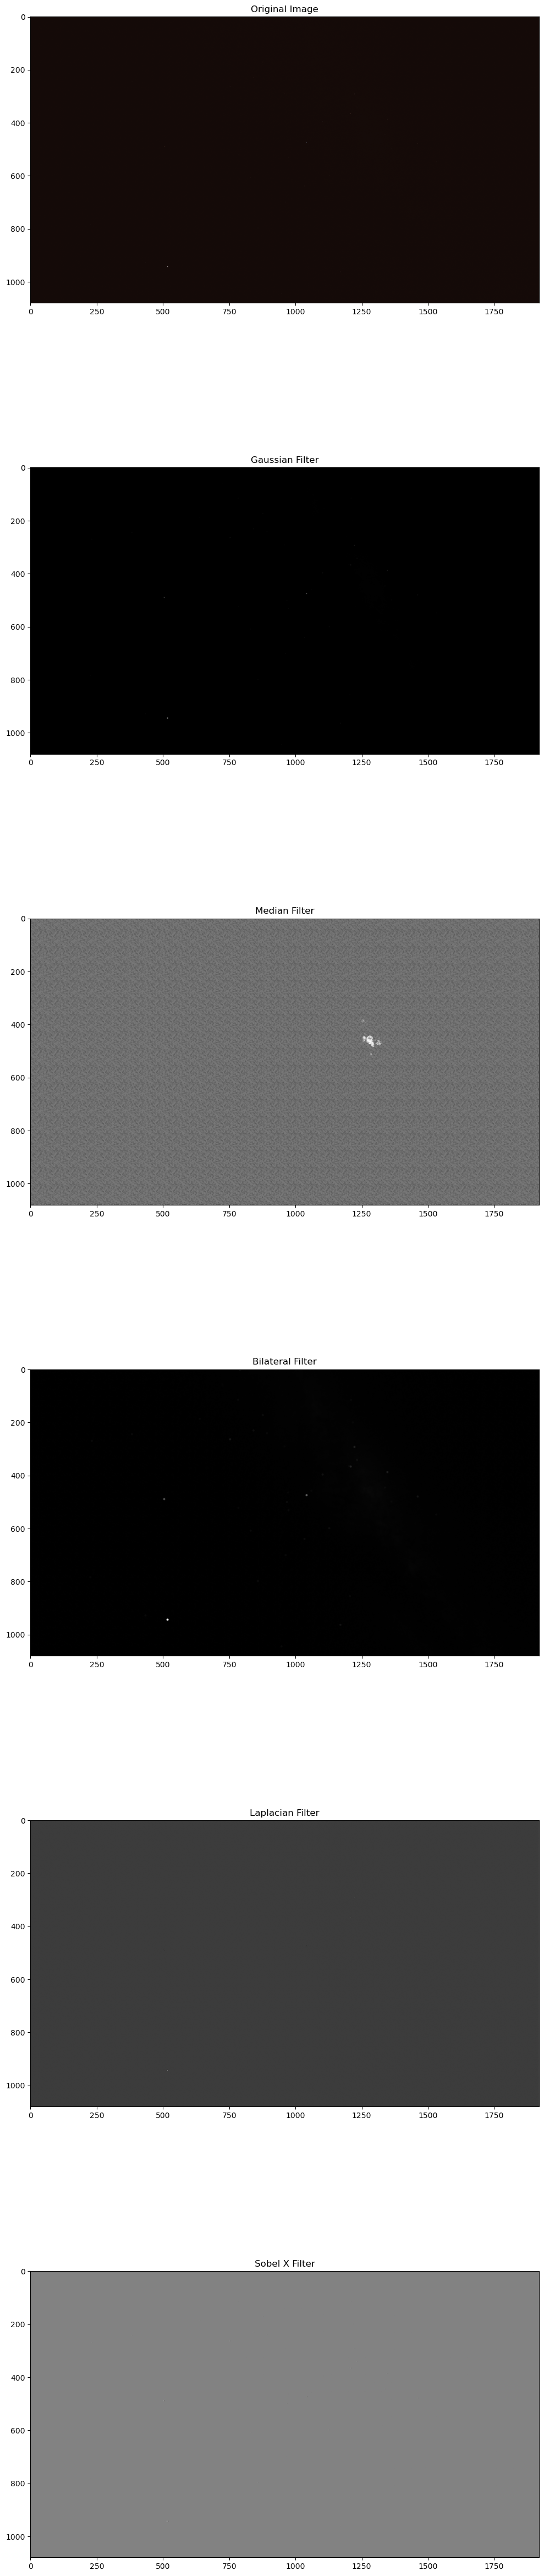

<Figure size 640x480 with 0 Axes>

In [8]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from skimage import filters

# read in an image
img_path = '/kaggle/input/clasificare2/clasificare2/train/poor/200lines.png'
img = cv2.imread(img_path)

img_norm = img.astype('float32') / 255.0
img_gray = cv2.cvtColor(img_norm, cv2.COLOR_BGR2GRAY)
img_laplacian = filters.laplace(img_gray)
img_gaussian = cv2.GaussianBlur(img_gray, (5, 5), 0)
img_median = cv2.medianBlur(img_gray, 5)
img_bilateral = cv2.bilateralFilter(img_gray, 9, 75, 75)
# img_laplacian = cv2.Laplacian(img_gray, cv2.CV_16S, ksize=3)
# img_laplacian = cv2.convertScaleAbs(img_laplacian)
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
img_sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)

img_gaussian = exposure.rescale_intensity(img_gaussian, out_range=(0, 255)).astype('uint8')
img_median = exposure.rescale_intensity(img_median, out_range=(0, 255)).astype('uint8')
img_bilateral = exposure.rescale_intensity(img_bilateral, out_range=(0, 255)).astype('uint8')
img_sobel_x = exposure.rescale_intensity(img_sobel_x, out_range=(0, 255)).astype('uint8')
img_sobel_y = exposure.rescale_intensity(img_sobel_y, out_range=(0, 255)).astype('uint8')

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10, 50))

ax[0].imshow(img_norm)
ax[0].set_title('Original Image')

ax[1].imshow(img_gaussian, cmap='gray')
ax[1].set_title('Gaussian Filter')

ax[2].imshow(img_median, cmap='gray')
ax[2].set_title('Median Filter')

ax[3].imshow(img_bilateral, cmap='gray')
ax[3].set_title('Bilateral Filter')

ax[4].imshow(img_laplacian, cmap='gray')
ax[4].set_title('Laplacian Filter')

ax[5].imshow(img_sobel_x, cmap='gray')
ax[5].set_title('Sobel X Filter')

plt.tight_layout()
plt.show()
plt.savefig('/kaggle/working')